In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import os

import excursion
import excursion.testcases.fast as scandetails
import excursion.optimize
import numpy as np
import datetime

import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')


/Users/lukas/Code/excursion/examples


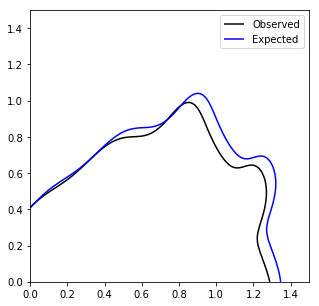

In [18]:
scandetails.truth_functions = [
    scandetails.truth,
    lambda X: scandetails.truth(X-0.05) #shift to simulate mismatch between exp / obs
]


truthv = excursion.utils.values2mesh(
    scandetails.truth(scandetails.plotX),
    scandetails.plot_rangedef,
    scandetails.invalid_region
)

contours = []
for truth_func in scandetails.truth_functions:
    contours.append(
        excursion.utils.values2mesh(
            truth_func(scandetails.plotX),
            scandetails.plot_rangedef,
            scandetails.invalid_region
        )
    )


legend = []
for cont,c in zip(contours, ['k','b']):
    curve = plt.contour(scandetails.plotG[0],scandetails.plotG[1],cont, levels = [0], colors=[c])
    legend.append(curve.collections[0])
plt.gcf().set_size_inches(5,5)
plt.legend(legend, ['Observed','Expected'])
plt.savefig('truth.png', bbox_inches = 'tight')
!pwd

In [19]:
def plot_and_save(workdir, index, *args):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

In [20]:
X, y_list, gps = excursion.optimize.init(scandetails, seed = 1)

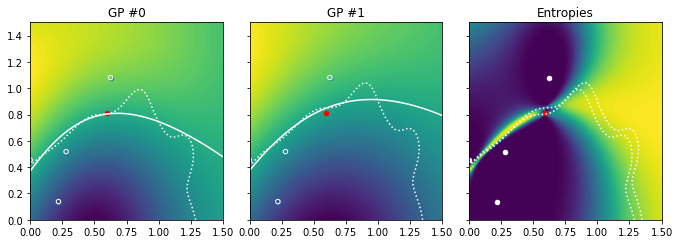

Iteration 0. new x: [[1.2   0.825]]
Iteration 0. Evaluted function 0 to values: [1.41753318]
Iteration 0. Evaluted function 1 to values: [1.22692817]


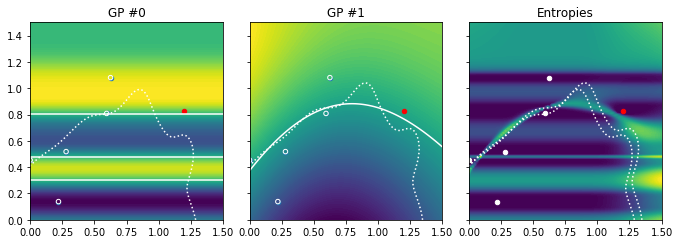

Iteration 1. new x: [[1.2   1.275]]
Iteration 1. Evaluted function 0 to values: [3.66045402]
Iteration 1. Evaluted function 1 to values: [3.50253832]


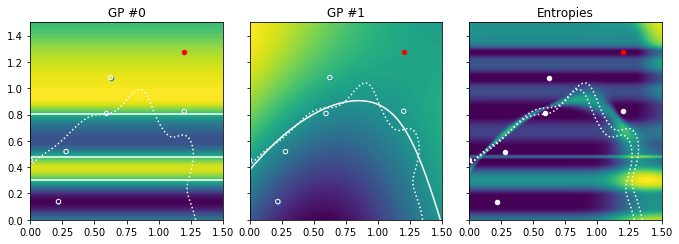

Iteration 2. new x: [[1.35 0.3 ]]
Iteration 2. Evaluted function 0 to values: [2.6621053]
Iteration 2. Evaluted function 1 to values: [1.33574798]


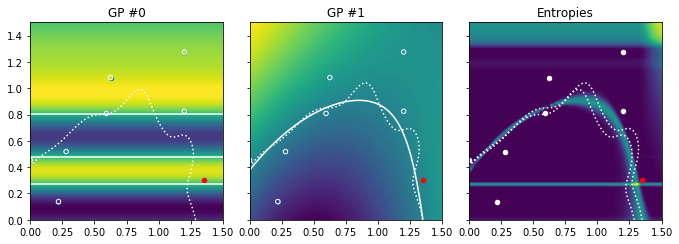

Iteration 3. new x: [[1.5   1.425]]
Iteration 3. Evaluted function 0 to values: [7.15103022]
Iteration 3. Evaluted function 1 to values: [6.77682993]


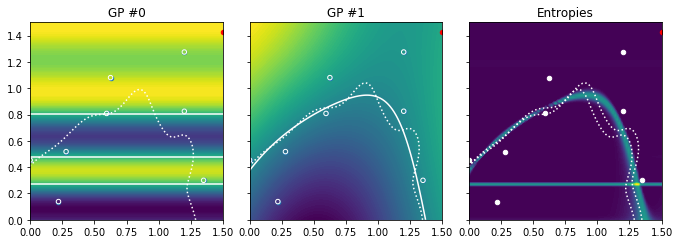

Iteration 4. new x: [[1.2   0.075]]
Iteration 4. Evaluted function 0 to values: [-0.77638641]
Iteration 4. Evaluted function 1 to values: [-1.20647476]


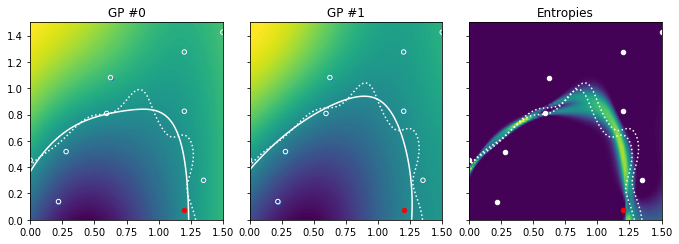

Iteration 5. new x: [[0.975 0.825]]
Iteration 5. Evaluted function 0 to values: [0.30649722]
Iteration 5. Evaluted function 1 to values: [-1.37283324]


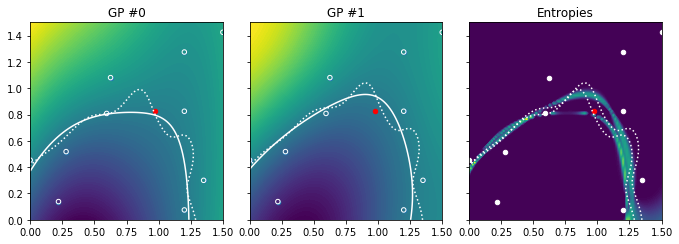

Iteration 6. new x: [[1.2  0.45]]
Iteration 6. Evaluted function 0 to values: [-0.6865136]
Iteration 6. Evaluted function 1 to values: [-0.57660756]


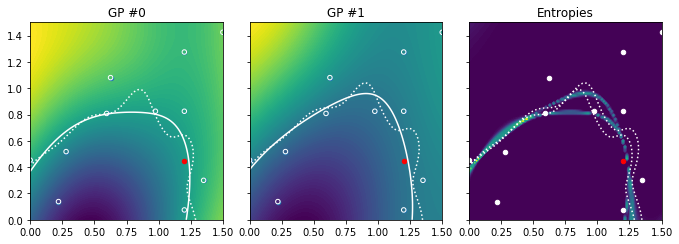

Iteration 7. new x: [[0.3  0.75]]
Iteration 7. Evaluted function 0 to values: [3.75115619]
Iteration 7. Evaluted function 1 to values: [3.7641984]


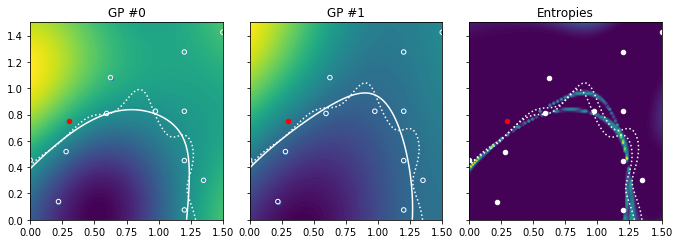

Iteration 8. new x: [[1.05  0.825]]
Iteration 8. Evaluted function 0 to values: [1.51155168]
Iteration 8. Evaluted function 1 to values: [0.3482449]


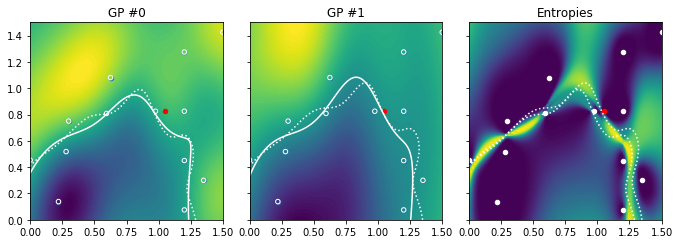

Iteration 9. new x: [[0.9  1.05]]
Iteration 9. Evaluted function 0 to values: [0.89252812]
Iteration 9. Evaluted function 1 to values: [0.11369042]


In [21]:
N_UPDATES = 10

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [excursion.get_gp(X,y_list[i]) for i in range(len(scandetails.truth_functions))]

    plot_and_save(workdir, index, gps,X,y_list,scandetails)

    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)

    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [func(newx) for func in scandetails.truth_functions]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,newx])